In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
week_8_df = pd.read_csv('datasets/raw/2016/Week 8 Feedback (2016, incomplete) - results.csv')
pd.options.display.max_rows = 66
week_8_df

FileNotFoundError: File b'datasets/raw/2016/Week 8 Feedback (2016, incomplete) - results.csv' does not exist

In [20]:
#CLEANING

del week_8_df['Network ID'] #deleting network ID column
del week_8_df['#'] #deleting weird hash id

week_8_df.rename(columns={'How likely is it that you would recommend the Make School Summer Academy to a friend?': 
                          'NPS Rating', 'location':'Location', 'track':'Track', 
                          'Start Date (UTC)':'Survey Start', 'Submit Date (UTC)':'Survey Submit'}, inplace=True)
week_8_df['Track'] = week_8_df['Track'].replace(['summerApps', 'summerIntro', 'summerGames','summerVR', 
                                                 'summerApps (4-week)', 'summerGames (4-week)'], 
                                                ['Apps', 'Intro', 'Games', 'VR', 'Apps', 'Games'])



week_8_df['NPS Rating'] = week_8_df['NPS Rating'].replace([10, 9, 7, 8, 6, 5, 4, 3, 2, 1],['Promoter', 'Promoter','Passive','Passive', 'Detractor', 'Detractor', 'Detractor', 'Detractor', 'Detractor', 'Detractor'])

#stripping the date, extracting the time
week_8_df['Survey Start'] = pd.to_datetime(week_8_df['Survey Start'], utc=True).dt.time
week_8_df['Survey Submit'] = pd.to_datetime(week_8_df['Survey Submit'], utc=True).dt.time
week_8_df

,NPS Rating,Location,Track,Survey Start,Survey Submit
0,Promoter,New York,Apps,01:03:00,01:04:00
1,Promoter,San Francisco,Intro,01:03:00,01:04:00
2,Promoter,New York,Intro,01:03:00,01:05:00
3,Promoter,Sunnyvale,Apps,01:04:00,01:06:00
4,Detractor,San Francisco,Intro,01:04:00,01:11:00
5,Promoter,San Francisco,Apps,01:09:00,01:13:00
6,Passive,San Francisco,Apps,01:04:00,01:14:00
7,Detractor,New York,Games,01:14:00,01:15:00
8,Detractor,Singapore,Apps,01:16:00,01:21:00
9,Promoter,New York,Games,01:22:00,01:27:00


In [21]:
##sql queries converted to pandas

#PROMOTER SCORE COUNT BY LOCATION
sf_score = week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Location'] == 'San Francisco')].count()
#san_fran_score = 21
ny_score = week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Location'] == 'New York')].count()
#ny_score = 7
sunny_score = week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Location'] == 'Sunnyvale')].count()
#sunny_score = 10
la_score = week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Location'] == 'Los Angeles')].count()
#la_score = 10
sing_score =  week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Location'] == 'Singapore')].count()
#sing_score = 2

In [22]:
#TOTAL COUNT
sf_count = week_8_df[(week_8_df['Location'] == 'San Francisco')].count()
#sf_count = 29
ny_count = week_8_df[(week_8_df['Location'] == 'New York')].count()
sunny_count = week_8_df[(week_8_df['Location'] == 'Sunnyvale')].count()
la_count = week_8_df[(week_8_df['Location'] == 'Los Angeles')].count()
sing_count = week_8_df[(week_8_df['Location'] == 'Singapore')].count()


In [23]:
#PROMOTER SCORE AVERAGE
prom_score_sf = sf_score/sf_count #72%
prom_score_ny = ny_score/ny_count #58%
prom_score_sunny = sunny_score/sunny_count #62%
prom_score_la = la_score/la_count #66%
prom_score_sing = sing_score/sing_count #40%


In [24]:
#PROMOTER SCORE COUNT BY TRACK

apps_track_df = week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Track'] == 'Apps')].count() #18
games_track_df =  week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Track'] == 'Games')].count() #14
intro_track_df = week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Track'] == 'Intro')].count() #8
vr_track_df = week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Track'] == 'VR')].count() #2


In [25]:
#TRACKS COUNT
app_count = week_8_df[(week_8_df['Track'] == 'Apps')].count()
games_count = week_8_df[(week_8_df['Track'] == 'Games')].count()
intro_count = week_8_df[(week_8_df['Track'] == 'Intro')].count()
vr_count = week_8_df[(week_8_df['Track'] == 'VR')].count()


In [26]:
#PROMOTER SCORE AVERAGE BY TRACK
prom_score_apps = apps_track_df/app_count #60%
prom_score_games = games_track_df/games_count #70%
prom_score_intro = intro_track_df/intro_count #66%
prom_score_vr = vr_track_df/vr_count #66%


In [27]:
#TIME ELAPSED

# time_start = week_8_df['Survey Start']
# time_end = week_8_df['Survey Submit']
# time_elapsed = time_start - time_end
# week_8_df['Time Elapsed'] = (week_8_df['Survey Start'] - week_8_df['Survey Submit']).dt.time
# # week_8_df['Time Elapsed'] = (week_8_df['Survey Start'] - week_8_df['Survey Submit'].shift()).fillna(0)


# startTime = week_8_df.index['0']
# elapsedS = week_8_df.index - startTime
# elapsedS
# #f_test['Difference'] = df_test['first_date'] - df_test['second_date'] 

[]

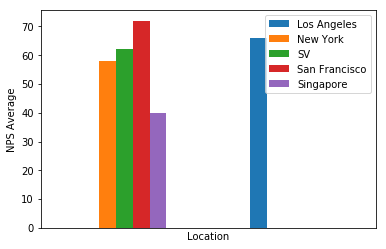

In [28]:
nps_location_ave = [{'San Francisco': 72, 'SV': 62, 'Singapore': 40, 'New York': 58}, {'Los Angeles': 66 }]
loc_df = pd.DataFrame(nps_location_ave)

ax = loc_df.plot(kind='bar')
ax.set_xlabel('Location')
ax.set_ylabel('NPS Average')
ax.set_xticks([]) 

[]

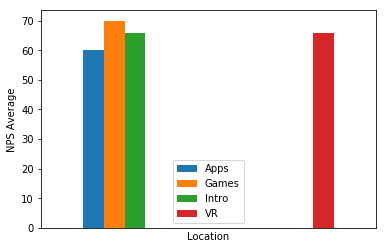

In [29]:
nps_track_ave = [{'Apps': 60, 'Games': 70, 'Intro': 66}, {'VR': 66 }]
track_df = pd.DataFrame(nps_track_ave)

ax = track_df.plot(kind='bar')
ax.set_xlabel('Location')
ax.set_ylabel('NPS Average')
ax.set_xticks([]) 